# Dataset Test

Our dataset is about **Big Mart Sales Dataset** we are trying to figure out what are the factors that contributes to the highest Item sales.

* [Data Wrangle](#Data-Wrangle).
* [Issues in Data](#Issues-in-Our-Data-are-as-follows:).
* [Analysis and Visualizations](#Analysis-and-Visualizations).
* [Conclustions](#Conclusions).
* [Limitations](#Limitations-and-Issues).
***

# Data Wrangle

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
matplotlib.style.use("dark_background")

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* `LF` ,`reg` should be replaced with `low fat`,`regular` and `Item_Fat_Content` should be catagorical datatype.

In [7]:
train['Item_Visibility'].sort_values()

596     0.000000
5881    0.000000
3255    0.000000
3257    0.000000
3259    0.000000
          ...   
2855    0.309390
7250    0.311090
1805    0.321115
3750    0.325781
854     0.328391
Name: Item_Visibility, Length: 8523, dtype: float64

In [8]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
train.shape

(8523, 12)

In [10]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [11]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
train['Item_Outlet_Sales'].sort_values(kind='mergesort')

906        33.2900
6950       33.2900
2571       33.9558
3053       34.6216
7388       35.2874
           ...    
6541    10306.5840
4349    10993.6896
1450    11445.1020
5223    12117.5600
7188    13086.9648
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [15]:
train.duplicated(keep=False).value_counts()

False    8523
dtype: int64

* no duplicate values so far so good.
***

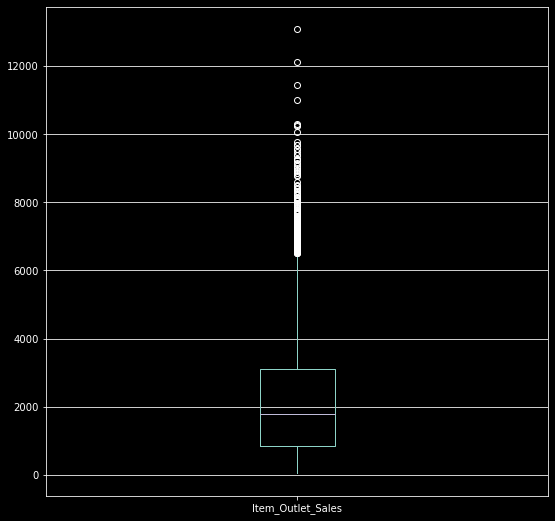

In [16]:
train['Item_Outlet_Sales'].plot.box(figsize=(9,9))
plt.grid(axis='y')

* as we can see there is tons of outliers.
***

# Issues in Our Data are as follows:

- [x] `LF` ,`reg` should be replaced with `low fat`,`regular` and `Item_Fat_Content` should be catagorical datatype.

In [17]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].str.lower()

In [18]:
train['Item_Fat_Content'].value_counts()

low fat    5201
regular    2889
lf          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [19]:
train['Item_Fat_Content'].replace({'lf':'low fat','reg':'regular'},inplace=True)

In [20]:
train['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

let's try to get rid of the outliers by using [iqr](https://en.wikipedia.org/wiki/Interquartile_range).

In [21]:
q = iqr(train['Item_Outlet_Sales'],interpolation='midpoint')
q

2267.049

In [22]:
upper_limit_1 = np.percentile(train['Item_Outlet_Sales'],75) + 1.5*q
upper_limit_1

6501.8699

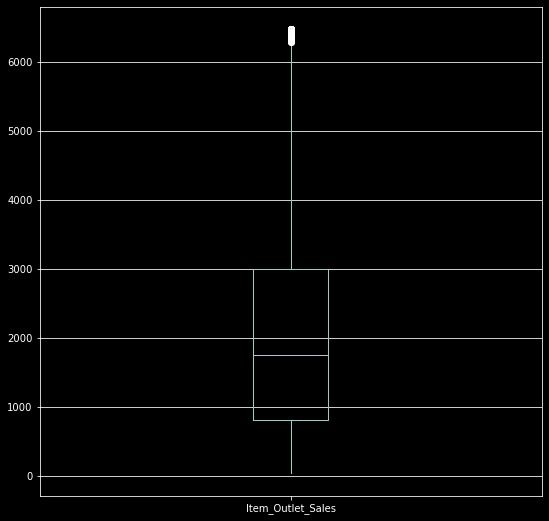

In [23]:
train[train['Item_Outlet_Sales'] <= upper_limit_1]['Item_Outlet_Sales'].plot.box(figsize=(9,9))
plt.grid(axis='y')

In [24]:
x= train[train['Item_Outlet_Sales'] <= upper_limit_1]['Item_Outlet_Sales'].sort_values()
x

906       33.2900
6950      33.2900
2571      33.9558
3053      34.6216
7388      35.2874
          ...    
7149    6474.2392
6696    6474.2392
5413    6474.2392
6092    6474.2392
4378    6478.2340
Name: Item_Outlet_Sales, Length: 8337, dtype: float64

In [25]:
q = iqr(x,interpolation='midpoint')
upper_limit = np.percentile(x,75) + 1.5*q
upper_limit

6278.8269

* as we can see there is no point of removing the outliers they are just too much let's draw a histogram.

CPU times: user 84.5 ms, sys: 11.5 ms, total: 96 ms
Wall time: 110 ms


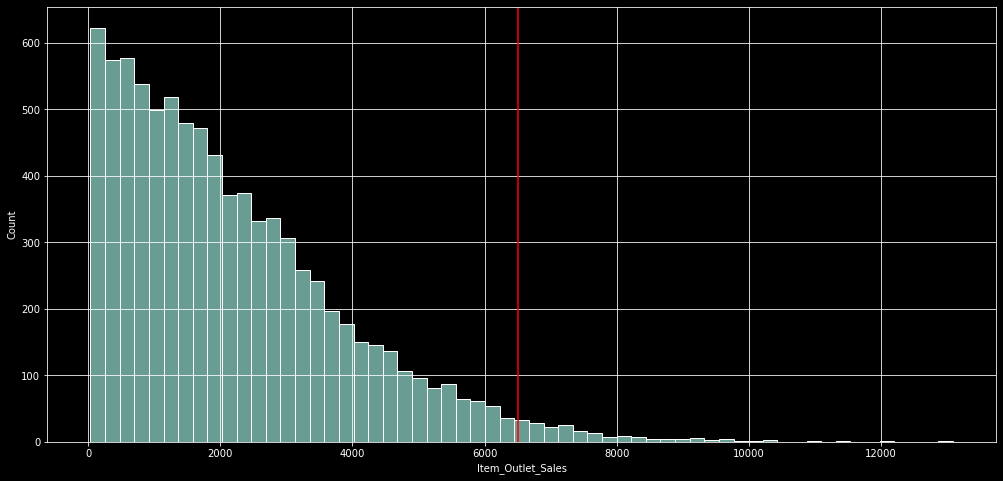

In [26]:
%%time
plt.figure(figsize=(17,8))
sb.histplot(data=train,x='Item_Outlet_Sales')
plt.axvline(upper_limit_1,c='red')
plt.grid(axis='both')

In [27]:
(train['Item_Outlet_Sales'] > upper_limit).mean() * 100

2.6399155227032733

2.63% by total amount of 225 observations of our data are misleading and will affect the results of our analysis.

In [28]:
train[train['Item_Outlet_Sales'] > upper_limit]['Item_Outlet_Sales'].size

225

* importing data with the missing values.
* it's important to record the missing values from some of our rows so we can trace them and investigate them later on.

In [29]:
missin_weight_values = train[train['Item_Weight'].isnull()]
missin_weight_values.to_csv('missin_weight_values',index=False)

In [30]:
missing_Outlet_Size_values = train[train['Outlet_Size'].isnull()]
missing_Outlet_Size_values.to_csv('missing_outliet_size_values',index=False)

***
## Analysis and Visualizations

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


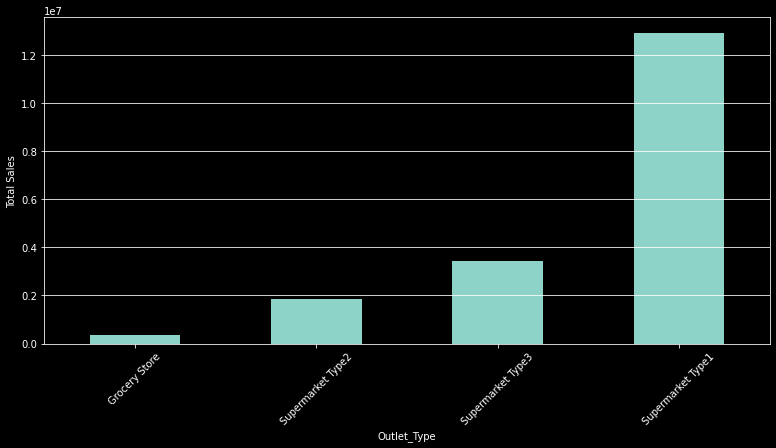

In [32]:
train.groupby(by='Outlet_Type').sum()["Item_Outlet_Sales"].sort_values().plot.bar(figsize=(13,6))
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.grid(axis='y')

* **Supermarket Type1** has seen the highest item sales overall.

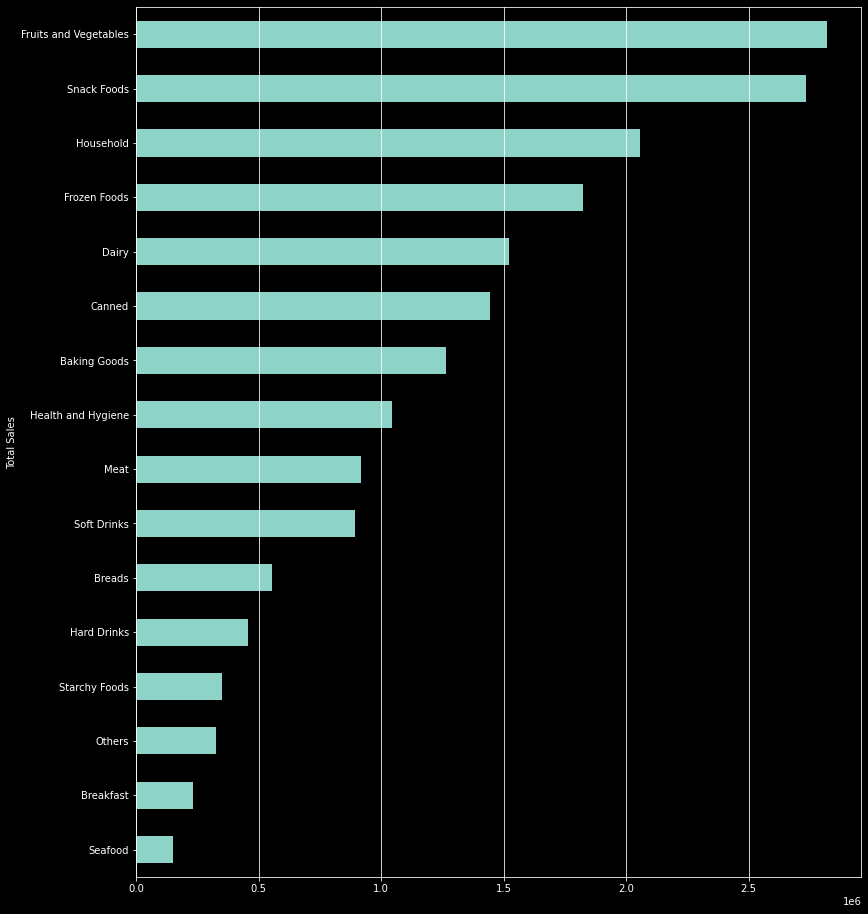

In [33]:
train.groupby(by='Item_Type').sum()["Item_Outlet_Sales"].sort_values().plot.barh(figsize=(13,16))
plt.xticks()
plt.ylabel('Total Sales')
plt.grid(axis='x')

* **Fruits and Vegetables** are the most selling item types.

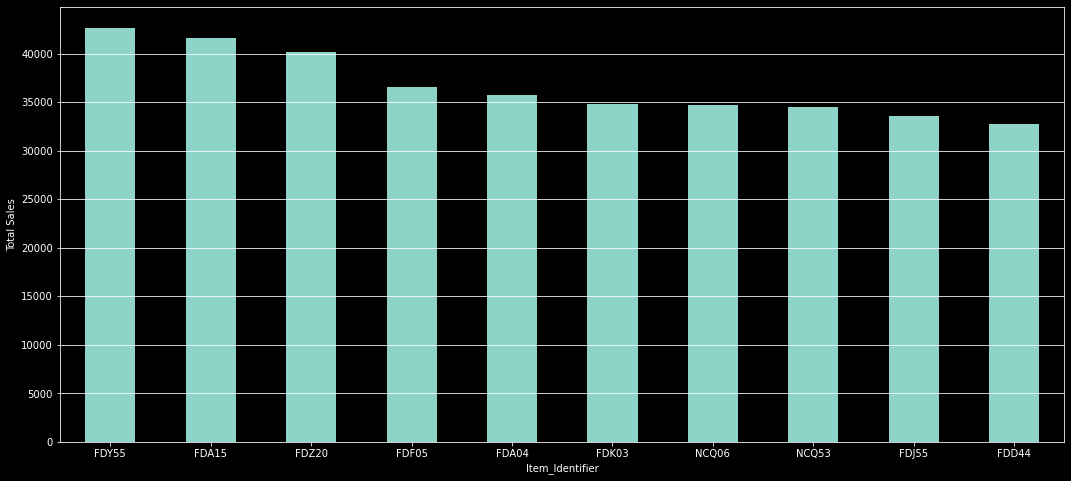

In [34]:
train.groupby(by='Item_Identifier').sum()["Item_Outlet_Sales"].sort_values(ascending=False).head(10).plot.bar(figsize=(18,8))
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.grid(axis='y')

**FDY55** is the most selling item overall accross all shops.

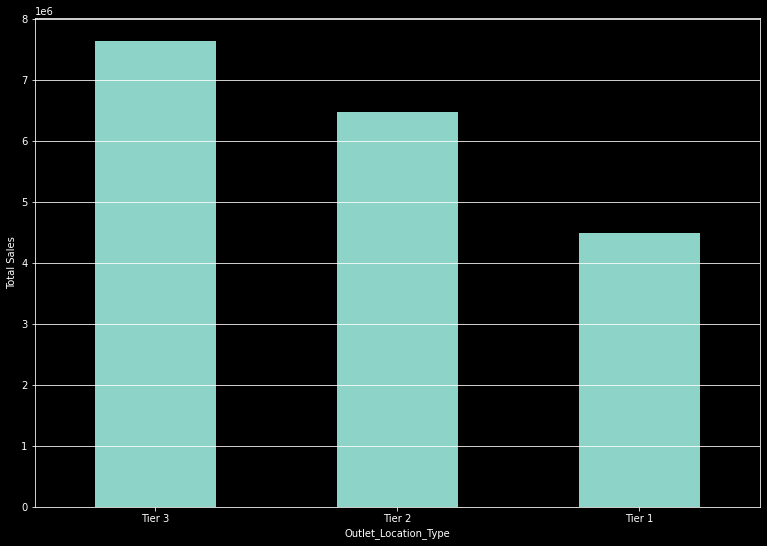

In [35]:
train.groupby(by='Outlet_Location_Type').sum()["Item_Outlet_Sales"].sort_values(ascending=False).plot.bar(figsize=(13,9))
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.grid(axis='y')

**Tier 3** location type has the highest sales.

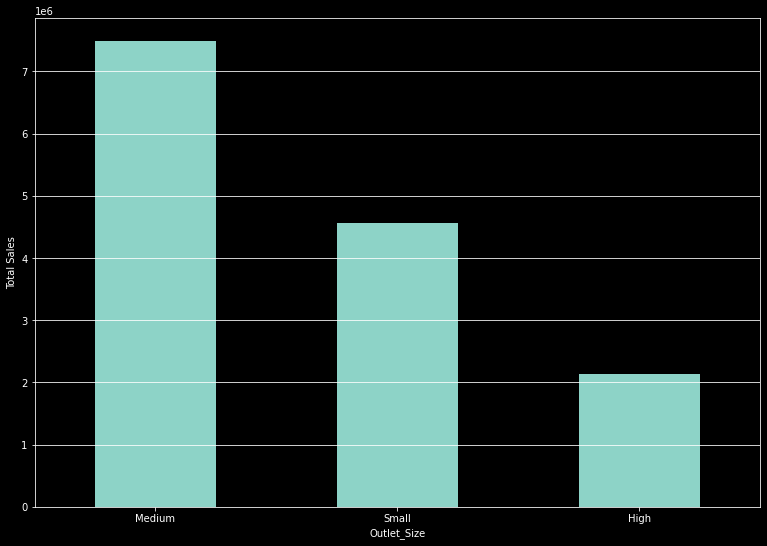

In [36]:
train.groupby(by='Outlet_Size').sum()["Item_Outlet_Sales"].sort_values(ascending=False).plot.bar(figsize=(13,9))
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.grid(axis='y')

* **Medium outlets** have the highest sales.

In [37]:
x = train.groupby(by='Item_Identifier').sum()['Item_Outlet_Sales']
x

Item_Identifier
DRA12    11061.6012
DRA24    15723.5328
DRA59    20915.4412
DRB01     4554.0720
DRB13    12144.1920
            ...    
NCZ30    12653.5290
NCZ41     9137.4392
NCZ42    19199.0088
NCZ53    15073.7120
NCZ54    22743.7280
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [38]:
y = train[['Item_Identifier','Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']]
y[['Item_Outlet_Sales','Item_MRP']].duplicated().value_counts()

False    8426
True       97
dtype: int64

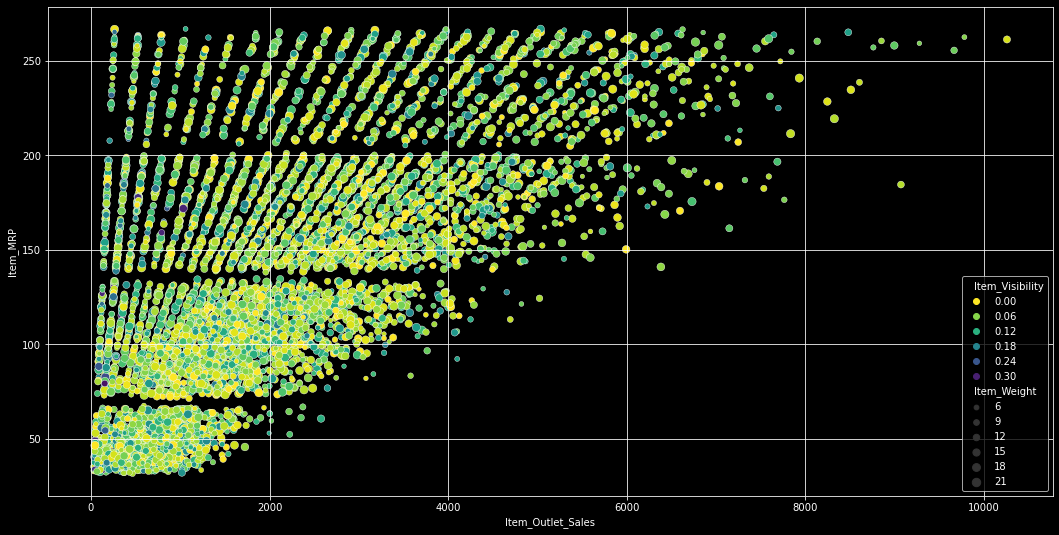

In [39]:
plt.figure(figsize=(18,9))
sb.scatterplot(data=train,x='Item_Outlet_Sales',y='Item_MRP',hue='Item_Visibility',palette='viridis_r',size='Item_Weight')
plt.grid(axis='both')

* by looking at Item Sales between >6000 we can see that they have an MRP >200 with the highest item sales having an MRP >250.
* as for the wight there is no dominant weight of the most saled items.
* as for the visibility the most saled items are between 0~12 visibility points.

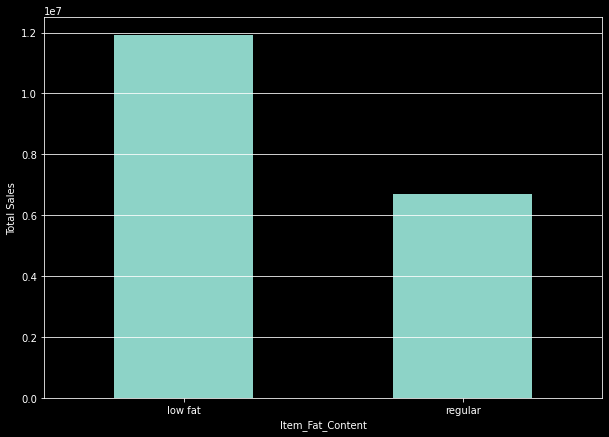

In [40]:
train.groupby(by='Item_Fat_Content').sum()["Item_Outlet_Sales"].sort_values(ascending=False).plot.bar(figsize=(10,7))
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.grid(axis='y')

* as we can see above low fat has the highest total overall sales.

***
# Conclusions

* **Low Fat** seems to boost sales over **regular** fats.
* **Supermarket Type1** seems to boost sales more than any Outlet type.
* **FDY55** is the best selling and famous product among consumers.
* **Tier 3** boosts sales over the other location types.
* the highest sales are associated with the highest MRP prices.
* weight has no effect on sales.
* 0~12 is the ideal visibility for Items to boost their sales.
* **Medium** is the ideal size for our outlets.
* we must investigate in Fruits and vegetables to boost our sales.
***

# Limitations and Issues

* Outliers
> there are some noticible outliers in our data (2.6% percent of our data,225 observations) that may affect the results of our analysis and their accuracy as seen in the [issues phase](#Issues-in-Our-Data-are-as-follows:).

* Missing supplied items data.
> to make this analysis more accurate we need to include how many items and have been shipped to the market and include more information about the market not only the sales 
for example:
we have calculated the most selling items but we didn't compare its sales to their total shipments and supplies to the market and this may be misleading

* missing values in weight and outlet size columns
> some of our rows has no values about their outlet size and weight that will impact their analysis, the missing info for these records can be found in `missin_weight_values.csv` and `missing_outliet_size_values.csv` files, it's important to investigate these data to know why some values of our observations are missing and try to fill them and trace them based on other properties recorded for these observations.
***
* This document is created by [**Yousef Mohammed Saber**](https://github.com/YousefSaber).
***